In [15]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [16]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install -U matplotlib

Note: you may need to restart the kernel to use updated packages.


In [18]:
import re
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, pearsonr
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [19]:
# Load the File
df_str_rel = pd.read_csv('Task A/eng/eng_train.csv')
df_str_rel.head()

,PairID,Text,Score
0,ENG-dev-0000,The story is gripping and interesting.\nIt's a...,0.64
1,ENG-dev-0001,The majority of Southeast Alaska 's area is pa...,0.61
2,ENG-dev-0002,and from your post i think you are to young to...,0.31
3,ENG-dev-0003,The film 's success also made Dreamworks Anima...,0.59
4,ENG-dev-0004,I am still confused about how I feel about thi...,0.50


In [20]:
df_str_rel['Text'].values

array(["The story is gripping and interesting.\nIt's a brilliant, compelling, and heartfelt story.",
       "The majority of Southeast Alaska 's area is part of the Tongass National Forest , the United States ' largest national forest .\nA lot of of the panhandle is part of the Tongass National Forest , which is the biggest national forest in the United States .",
       'and from your post i think you are to young to be in love like this.\nI think it will be very bad if he acquires her money.',
       "The film 's success also made Dreamworks Animation create three sequels : Shrek 2 , Shrek the Third , and Shrek Forever After .\nThere have also been two sequels -LRB- follow-ups -RRB- of Shrek , called Shrek 2 and Shrek the Third .",
       'I am still confused about how I feel about this book.\nIn this particular book, Blue and Gansey are still struggling to reconcile their (very forbidden) feelings for each other.',
       'Connor is the exception to his families rules.\nHe does thin

In [21]:
# Creating a column "Split_Text" which is a list of two sentences.
df_str_rel['Split_Text'] = df_str_rel['Text'].apply(lambda x: x.split("\n"))
df_str_rel.head()

,PairID,Text,Score,Split_Text
0,ENG-dev-0000,The story is gripping and interesting.\nIt's a...,0.64,"[The story is gripping and interesting., It's ..."
1,ENG-dev-0001,The majority of Southeast Alaska 's area is pa...,0.61,[The majority of Southeast Alaska 's area is p...
2,ENG-dev-0002,and from your post i think you are to young to...,0.31,[and from your post i think you are to young t...
3,ENG-dev-0003,The film 's success also made Dreamworks Anima...,0.59,[The film 's success also made Dreamworks Anim...
4,ENG-dev-0004,I am still confused about how I feel about thi...,0.50,[I am still confused about how I feel about th...


In [22]:
pip install -U sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [23]:
from numpy.linalg import norm

In [24]:
def dice_score(s1,s2):
    from sentence_transformers import SentenceTransformer, util
    model = SentenceTransformer('all-mpnet-base-v2')

    #Encode all sentences
    embeddings1 = model.encode(s1)
    embeddings2 = model.encode(s2)

    #Compute cosine similarity between all pairs
    cosine = np.dot(embeddings1,embeddings2)/(norm(embeddings1)*norm(embeddings2))
    return cosine


    

In [25]:
true_scores = df_str_rel['Score'].values
pred_scores = []

for index,row in df_str_rel.iterrows():
  s1,s2 = row["Text"].split("\n")
  # cosine similarity
  pred_scores.append(dice_score(s1,s2)) 

In [30]:
# How well does the baseline correlate with human judgments?
print("Spearman Correlation:", round(spearmanr(true_scores,pred_scores)[0],2))

Spearman Correlation: 0.79


In [27]:
df_str_rel['Pred_Score'] = pred_scores
df_str_rel.head()

,PairID,Text,Score,Split_Text,Pred_Score
0,ENG-dev-0000,The story is gripping and interesting.\nIt's a...,0.64,"[The story is gripping and interesting., It's ...",0.798045
1,ENG-dev-0001,The majority of Southeast Alaska 's area is pa...,0.61,[The majority of Southeast Alaska 's area is p...,0.632959
2,ENG-dev-0002,and from your post i think you are to young to...,0.31,[and from your post i think you are to young t...,0.204207
3,ENG-dev-0003,The film 's success also made Dreamworks Anima...,0.59,[The film 's success also made Dreamworks Anim...,0.807259
4,ENG-dev-0004,I am still confused about how I feel about thi...,0.50,[I am still confused about how I feel about th...,0.478068


In [28]:
df_str_rel[['PairID', 'Pred_Score']].to_csv('pred_pilot_eng.csv', index=False)

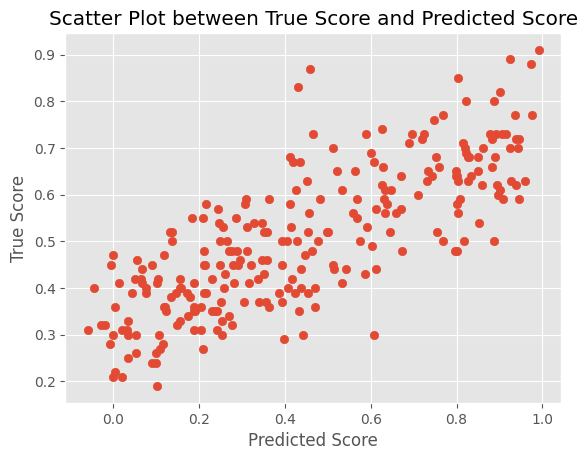

In [29]:
import matplotlib.pyplot as plt


# Create a scatter plot
plt.scatter(pred_scores, true_scores)

# Add labels and a title
plt.xlabel('Predicted Score')
plt.ylabel('True Score')
plt.title('Scatter Plot between True Score and Predicted Score')

# Display the plot
plt.show()
